In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house_sales = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv")

In [ ]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_sales.tail()    # Displays last five rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


##### 1. Data Wrangling

In [ ]:
# returns number of missing data in each column, 0 indicates No missing value
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### Asuumptions of Linear Regression.
1. Is Label is Normally Distributed?

<Axes: xlabel='price', ylabel='Density'>

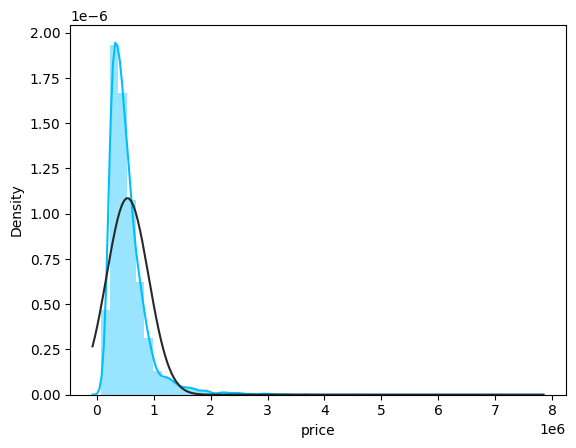

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
sns.distplot(house_sales['price'], fit = norm, color = 'deepskyblue')

<Axes: >

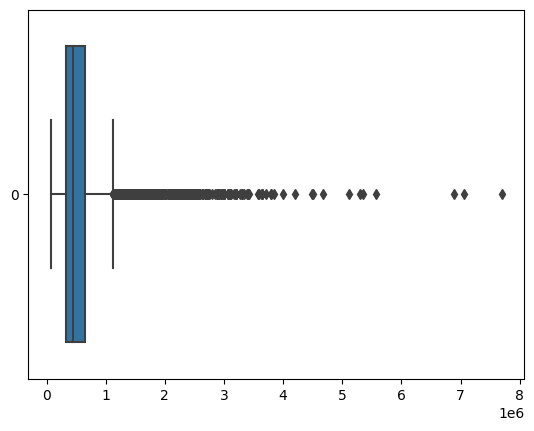

In [ ]:
# Is Price (Label) is having outliers ?
sns.boxplot(house_sales['price'], orient = 'h')

In [ ]:
house_df = house_sales.drop(['id',	'date'], axis = 1)

In [ ]:
# Find the outliers using z-score
from scipy.stats import zscore
z = np.abs(zscore(house_df))

In [ ]:
np.where((z > 4))

(array([    1,     5,    21, ..., 21576, 21576, 21576]),
 array([13, 17,  7, ...,  0,  6,  7]))

In [ ]:
house_df1 = house_df.drop(np.where((z > 4))[0])
house_df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: xlabel='price', ylabel='Density'>

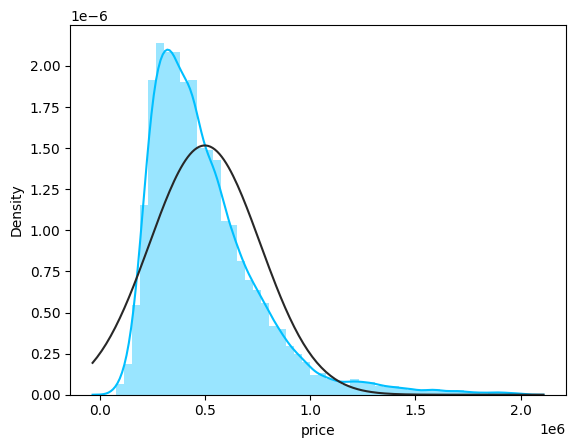

In [ ]:
sns.distplot(house_df1['price'], fit = norm, color = 'deepskyblue')

###### Correlation
    * Selecting Features using Correlation
    * Is there any multicollinear Features?

In [ ]:
house_df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.321286,0.481714,0.660276,0.105647,0.279860,NaN,0.269650,0.048557,0.667969,0.570948,0.245349,0.082016,NaN,-0.051302,0.392863,0.052420,0.585281,0.098728
bedrooms,0.321286,1.000000,0.510727,0.608286,0.090847,0.167300,NaN,0.064322,0.027448,0.355461,0.493195,0.286285,0.180255,NaN,-0.172308,-0.028594,0.161829,0.411443,0.093223
bathrooms,0.481714,0.510727,1.000000,0.730185,0.072335,0.512301,NaN,0.122469,-0.135104,0.639737,0.656148,0.225857,0.572693,NaN,-0.224431,0.007217,0.260446,0.556321,0.079813
sqft_living,0.660276,0.608286,0.730185,1.000000,0.226017,0.357483,NaN,0.203955,-0.066148,0.740311,0.863266,0.374239,0.367693,NaN,-0.219105,0.039630,0.280128,0.763875,0.230192
sqft_lot,0.105647,0.090847,0.072335,0.226017,1.000000,-0.078770,NaN,0.044459,0.024536,0.145014,0.219297,0.040153,0.036384,NaN,-0.179602,-0.069257,0.279318,0.251142,0.792672
floors,0.279860,0.167300,0.512301,0.357483,-0.078770,1.000000,NaN,-0.001011,-0.280868,0.467558,0.537070,-0.285958,0.532429,NaN,-0.068870,0.043249,0.140276,0.283205,-0.079748
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.269650,0.064322,0.122469,0.203955,0.044459,-0.001011,NaN,1.000000,0.035877,0.179625,0.095178,0.224939,-0.047142,NaN,0.087257,0.006220,-0.075801,0.216358,0.034759
condition,0.048557,0.027448,-0.135104,-0.066148,0.024536,-0.280868,NaN,0.035877,1.000000,-0.162404,-0.176069,0.193811,-0.391591,NaN,0.004355,-0.006739,-0.109646,-0.109399,0.035010
grade,0.667969,0.355461,0.639737,0.740311,0.145014,0.467558,NaN,0.179625,-0.162404,1.000000,0.737947,0.095424,0.488096,NaN,-0.196849,0.109172,0.223164,0.698923,0.159238


<Axes: >

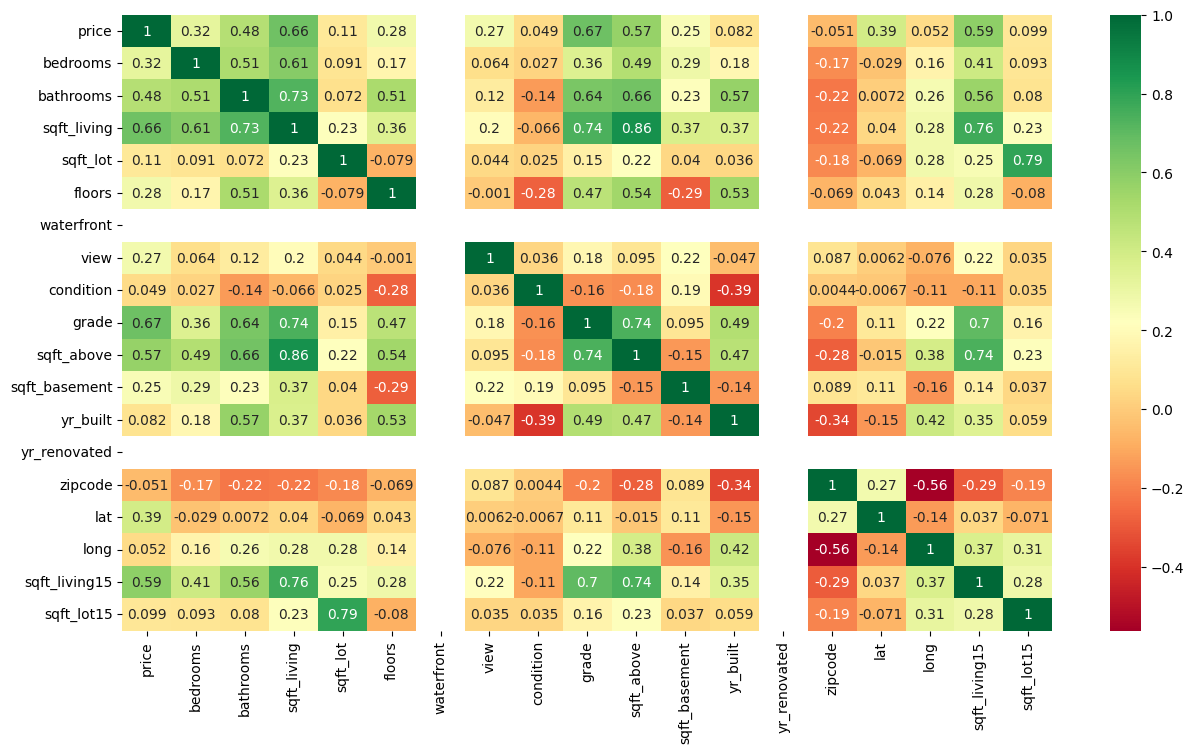

In [ ]:
plt.figure(figsize = (15,8))
# annot = showing values on heatmap plot, cmap = color gradient
sns.heatmap(house_df1.corr(), annot = True, cmap = 'RdYlGn')

<Axes: >

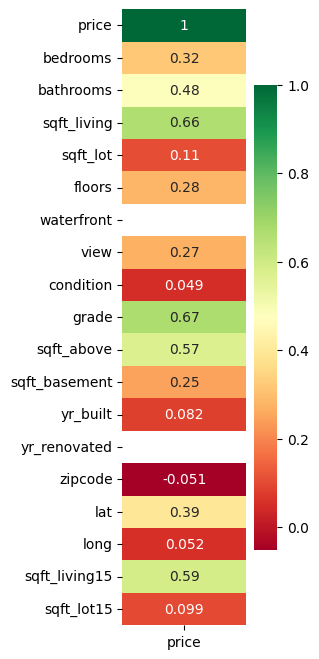

In [ ]:
plt.figure(figsize = (2,8))
# All weaker features correlation with target (ie. price) will be dropped
sns.heatmap(house_df1.corr()[['price']], annot = True, cmap = 'RdYlGn')

###### Features & Target

In [ ]:
house_df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = house_df1.drop(['waterfront','condition','yr_built','yr_renovated',
                    'zipcode','long','sqft_lot15','price'], axis = 1)
Y = house_df1['price']

##### Cross-Validation
    * It is process of splitting train & test samples randomnly to avoid overfitting of model.

In [ ]:
# Split into train & test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# r-squared
lr_model.score(x_test, y_test)

0.6635584890239761

##### Performance of LR Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
predictions = lr_model.predict(x_test)

In [ ]:
# MSE
mean_squared_error(y_test, predictions)

22111669199.137207

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, predictions))

148699.93005760698

In [ ]:
mean_absolute_error(y_test, predictions)

104910.21101347703

In [ ]:
y_test.min()

81000.0

In [ ]:
# r2_square
r2_score(y_test, predictions)

0.6635584890239761